# 2. Practical Part

## 1. Ridge Regression

We implement ridge regression as `regression_gradient`, a function of a `gradDescent` class:

In [187]:
import numpy as np
import matplotlib.pyplot as plt


class gradDescent():
    def __init__(self, weightedDecay = 0.01, stepSize = 0.01, numberSteps = 400):
        self.weightedDecay = weightedDecay
        self.stepSize = stepSize
        self.numberSteps = numberSteps

    def regression_gradient(self, weight, bias, data, target):
        '''
        bias: 1d scalar
        weightedDecay: λ
        stepSize: η
        x: data
        t: target
        
        '''
        for i in range(0, self.numberSteps):
            #gradient of one data, randomly chosen (Stochastic GD)
            index = np.random.randint(0, data.shape[0])
            
            grad =2*(weight * data[index]  + bias-target[index]) * data[index]
            #regularization lambda
            regGrad = 2 * self.weightedDecay * weight
            regGrad = regGrad + grad
                
            weight = weight - self.stepSize*regGrad
                
            biasGrad = 2*(weight * data[index]  + bias-target[index])
            bias = bias - self.stepSize*biasGrad
        return weight, bias     

## 2. Draw Dn from h(x)

We define our target function $h(x)$, and then draw a dataset $D_{n}$ from it:

In [188]:
def hX(x):
    '''
    defines the target function
    '''
    return np.sin(x) + 0.3*x -1

data = np.random.uniform(-5,5,15)
target = hX(data)
dataDn = [data, target]

##  3. Train without regularization, $\lambda$ = 0
We plot h(x), Dn, and our prediction function $f(X) = w^T X + b $ in the following part.

## 4. Part 3 revisited, with different $\lambda$ values
We extend the original plot to also plot predictions with $W$ regularized by $\lambda$ $\lVert w \rVert^2$, choosing an intermediate and large value for $\lambda$.

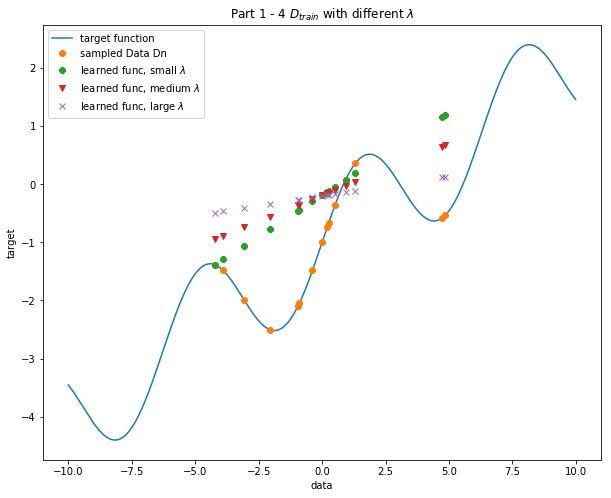

In [189]:
#initialize weights
weight = np.random.rand(1)
bias = 0

#param holders
regGDsmallParam = []
regGDMedParam = []
regGDLargeParam = []

#Small lambda
# reinit the params
weight = np.random.rand(1)
bias = 0
regGDsmall = gradDescent(weightedDecay = 0.01, stepSize = 0.00025)
regGDsmallParam = regGDsmall.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDMed = gradDescent(weightedDecay = 1, stepSize = 0.00025)
regGDMedParam = regGDMed.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDLarge = gradDescent(weightedDecay = 20, stepSize = 0.00025)
regGDLargeParam = regGDLarge.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# learned functions
learnedFuncSmall = (regGDsmallParam[0] * dataDn[0]) + regGDsmallParam[1]
learnedFuncMed = (regGDMedParam[0] * dataDn[0]) + regGDMedParam[1]
learnedFuncLarge = (regGDLargeParam[0] * dataDn[0]) + regGDLargeParam[1]
#plot data function
xvals = np.arange(-10, 10, 0.01)
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(xvals, hX(xvals), label = "target function")
plt.plot(dataDn[0], target, 'o', label="sampled Data Dn")
plt.plot(dataDn[0], learnedFuncSmall, '8', label = "learned func, small $\lambda$")
plt.plot(dataDn[0], learnedFuncMed, 'v', label = "learned func, medium $\lambda$")
plt.plot(dataDn[0], learnedFuncLarge, 'x', label = "learned func, large $\lambda$")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 1 - 4 $D_{train}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()


## 5. Sample $D_{test}$ from $h(X)$
We follow the same procedure as $D_{n}$ , training models on $\lambda$ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

See the plot below:

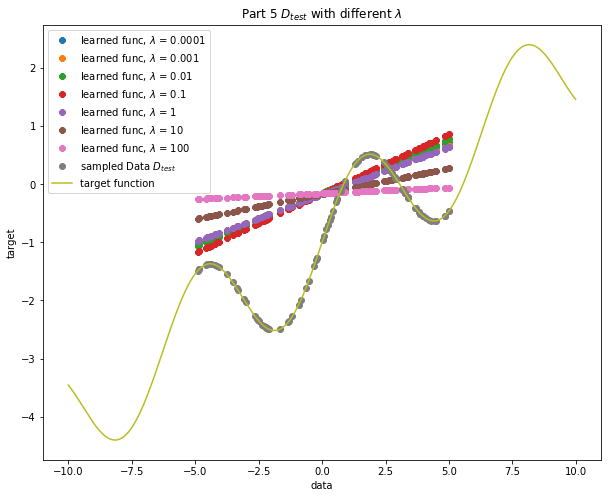

In [190]:
#sample D_test
data = np.random.uniform(-5,5,100)
target = hX(data)
dataDtest = [data, target]

lambdaVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
weight = np.random.rand(1)
bias = 0

lossArr = []

for i in lambdaVals:
    regGD = gradDescent(weightedDecay = i, stepSize = 0.00025)
    regGDParam = regGD.regression_gradient(weight, bias, dataDtest[0], dataDtest[1])
    
    xvals = np.arange(-10, 10, 0.01)
    plt.rcParams['figure.figsize'] = [10, 8]
    learnedFunc = (regGDParam[0] * dataDtest[0]) + regGDParam[1]
    
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr.append(loss)
    plt.plot(dataDtest[0], learnedFunc, '8', label = "learned func, $\lambda$ = {}".format(i) )    

plt.plot(dataDtest[0], dataDtest[1], 'o', label="sampled Data $D_{test}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 5 $D_{test}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()

### Then we plot $\lambda$  on the x-axis, and loss on the y-axis:
N.B. to TAs: we plotted $lambda$ on log scale

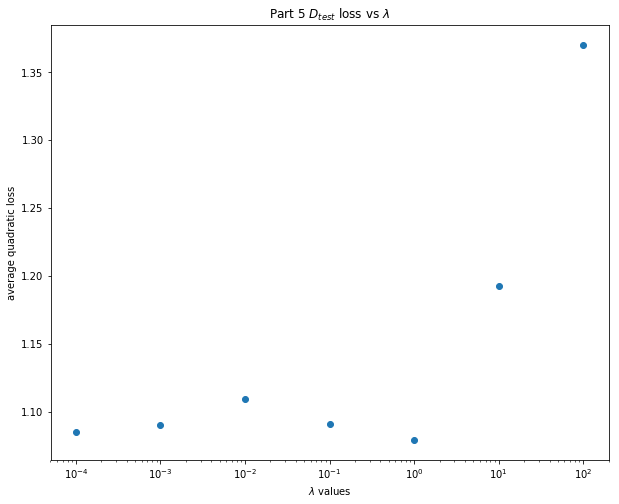

In [192]:
plt.plot(np.array(lambdaVals),np.array(lossArr), 'o')
plt.xlabel("$\lambda$ values")
plt.xticks(range(len(lambdaVals)), np.array(lambdaVals))
plt.xscale('log')
plt.ylabel("average quadratic loss")
plt.title("Part 5 $D_{test}$ loss vs $\lambda$")
plt.show()

## 6. Nonlinear preprocessing

We set $\lambda = 0.01$ and try fitting different degrees of polynomials.


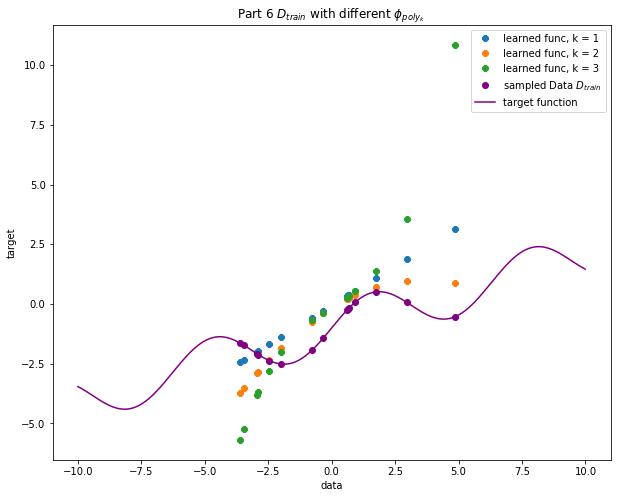

In [9]:
kDegreeArr = [1, 2, 3]
weight = np.random.rand(1)
bias = 0

plt.rcParams['figure.figsize'] = [10, 8]

lossArr_train = []
lossArr_test = []

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    to_map = [input_data[0]]
    for i in range(2, k+1): # kDegreeArr[j]+1):
        raised = np.power(input_data[0], k)
        to_map.append(raised)
    dataK = np.column_stack(to_map)
    dataKn = [dataK, input_data[1]] #same target
    return dataK, dataKn
    
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDn, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Plot
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    plt.plot(dataDn[0], learnedFunc, '8', label = "learned func, k = {}".format(k)) 
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDn[1])**2)
    lossArr_train.append(loss)
    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'o', label="sampled Data $D_{train}$", color='purple')
plt.plot(xvals, hX(xvals), label = "target function", color='purple')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()

## 7. Increasing $l$

We plot the the empirical risk (loss on $D_{n}$ and the true risk (loss on $D_{test}$) with increasing $l$:

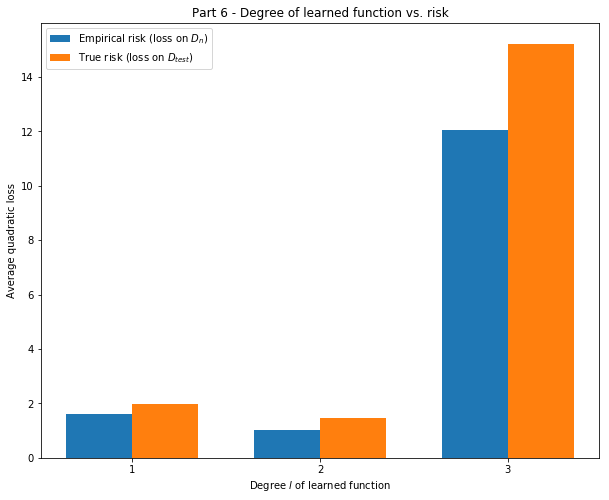

In [10]:
# Already got training loss, so now get testing loss:
lossArr_test = []
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDtest, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Get the function
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

# Plot
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3'))
plt.legend(loc='best')
plt.show()

### for readibility, we plot the error and learned function when Poly degree = 4 separately

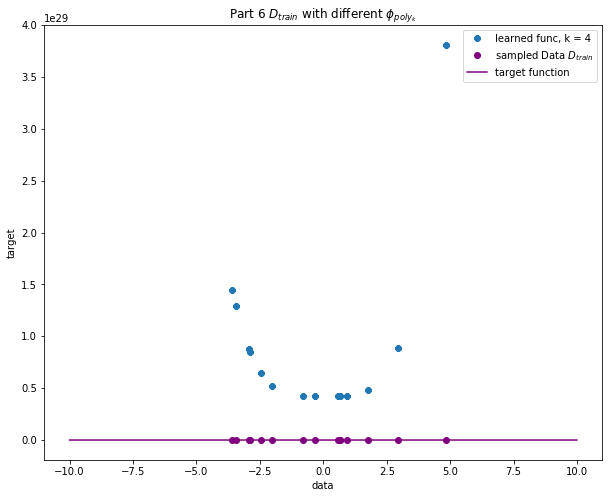

train loss dim = 4 is [1.5061164845828306e+58]
test loss dim = 4 is [1.8703884429546094e+171]


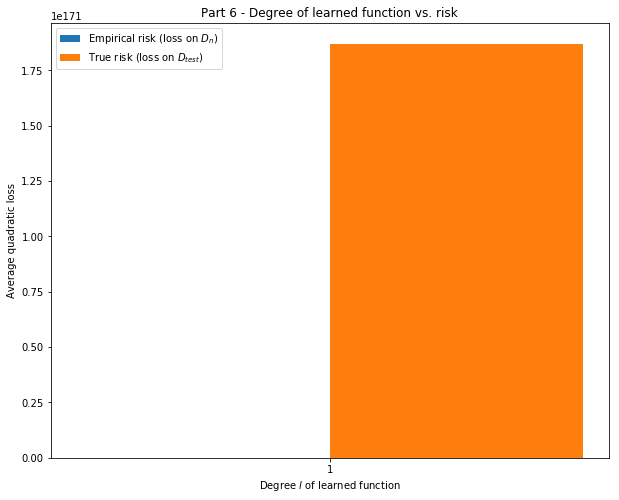

In [13]:
kDegreeArr = [4]#[1, 2, 3]
weight = np.random.rand(1)
bias = 0

plt.rcParams['figure.figsize'] = [10, 8]

lossArr_train = []
lossArr_test = []

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    to_map = [input_data[0]]
    for i in range(2, k+1): # kDegreeArr[j]+1):
        raised = np.power(input_data[0], k)
        to_map.append(raised)
    dataK = np.column_stack(to_map)
    dataKn = [dataK, input_data[1]] #same target
    return dataK, dataKn
    
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDn, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Plot
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    plt.plot(dataDn[0], learnedFunc, '8', label = "learned func, k = {}".format(k)) 
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDn[1])**2)
    lossArr_train.append(loss)
    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'o', label="sampled Data $D_{train}$", color='purple')
plt.plot(xvals, hX(xvals), label = "target function", color='purple')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()


# Already got training loss, so now get testing loss:
lossArr_test = []
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDtest, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Get the function
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

print("train loss dim = 4 is", lossArr_train)
print("test loss dim = 4 is", lossArr_test)
# Plot
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3'))
plt.legend(loc='best')
plt.show()

When $l$ increases to 3 and 4, the test error is significantly higher than dim  = 1, 2, 3. This shows that the model overfits when the feature mapping maps to a high dimension, in this case $\ge 4$. We can also visualize that we draw our data from a true target function, which is a polynomial of degree $=2$, and using a polynomial of $degree = 4$ is not a good approach.